# Getting Started with CayleyPy

This notebook provides a basic introduction to using CayleyPy for analyzing Cayley graphs and solving combinatorial puzzles.

In [1]:
# Import necessary libraries
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path to import cayleypy
sys.path.append('..')

from cayleypy import CayleyGraph, PermutationGroups, Puzzles
from cayleypy.graphs_lib import MatrixGroups

## Basic Permutation Groups

Let's start with a simple permutation group and analyze its Cayley graph.

In [14]:
# Create a simple LRX graph (Left shift, Right shift, eXchange first two elements)
graph_def = PermutationGroups.lrx(9)
print(f"Generators: {graph_def.generators}")
print(f"Generator names: {graph_def.generator_names}")
print(f"Central state: {graph_def.central_state}")

Generators: [[1, 2, 3, 4, 5, 6, 7, 8, 0], [8, 0, 1, 2, 3, 4, 5, 6, 7], [1, 0, 2, 3, 4, 5, 6, 7, 8]]
Generator names: ['L', 'R', 'X']
Central state: [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [15]:
# Create the Cayley graph and run BFS
graph = CayleyGraph(graph_def, device="cpu")
bfs_result = graph.bfs()

print(f"BFS completed: {bfs_result.bfs_completed}")
print(f"Diameter: {bfs_result.diameter()}")
print(f"Layer sizes: {bfs_result.layer_sizes}")
print(f"Total vertices: {bfs_result.num_vertices}")

BFS completed: True
Diameter: 36
Layer sizes: [1, 3, 6, 12, 24, 46, 85, 156, 283, 492, 845, 1415, 2258, 3476, 5188, 7448, 10303, 13816, 17827, 22311, 26810, 31091, 34664, 36935, 37516, 35651, 31354, 23197, 13382, 4680, 1212, 268, 88, 25, 8, 3, 1]
Total vertices: 362880


## Visualizing Growth Functions

Let's plot the growth function (number of vertices at each distance from the central state).

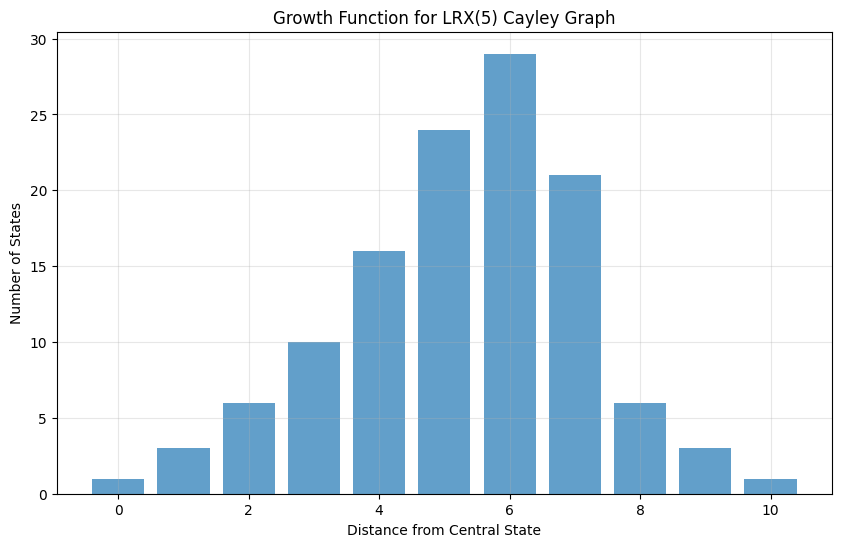

In [5]:
# Plot the growth function
plt.figure(figsize=(10, 6))
distances = range(len(bfs_result.layer_sizes))
plt.bar(distances, bfs_result.layer_sizes, alpha=0.7)
plt.xlabel('Distance from Central State')
plt.ylabel('Number of States')
plt.title('Growth Function for LRX(5) Cayley Graph')
plt.grid(True, alpha=0.3)
plt.show()

## Comparing Different Permutation Groups

Let's compare the growth functions of different permutation groups.

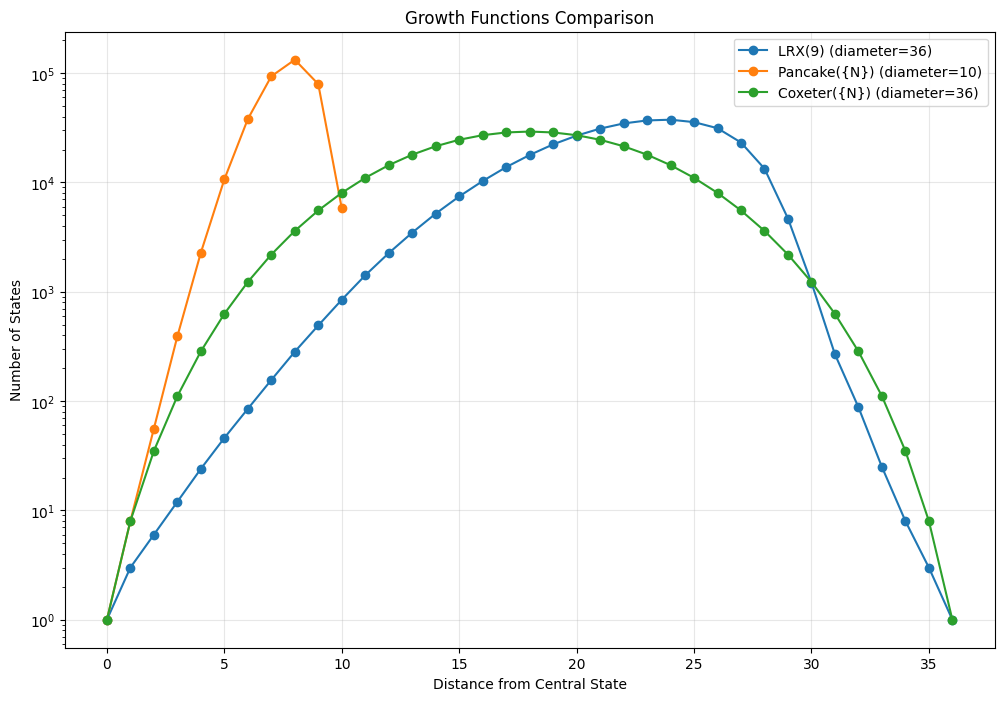

In [12]:
# Compare different permutation groups
N=9
groups_to_compare = [
    (f"LRX({N})", PermutationGroups.lrx(N)),
    (f"Pancake({N})", PermutationGroups.pancake(N)),
    (f"Coxeter({N})", PermutationGroups.coxeter(N)),
]

plt.figure(figsize=(12, 8))

for name, graph_def in groups_to_compare:
    graph = CayleyGraph(graph_def, device="cpu")
    result = graph.bfs()
    
    distances = range(len(result.layer_sizes))
    plt.plot(distances, result.layer_sizes, marker='o', label=f"{name} (diameter={result.diameter()})")

plt.xlabel('Distance from Central State')
plt.ylabel('Number of States')
plt.title('Growth Functions Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.show()

## Working with Puzzles

CayleyPy includes several built-in puzzles. Let's analyze a simple one.

In [7]:
# Analyze the Mini Pyramorphix puzzle
puzzle_def = Puzzles.mini_pyramorphix()
puzzle_graph = CayleyGraph(puzzle_def, device="cpu")

print(f"Mini Pyramorphix:")
print(f"  Generators: {len(puzzle_def.generators)}")
print(f"  Generator names: {puzzle_def.generator_names}")
print(f"  State size: {puzzle_def.state_size}")

# Run BFS with limited diameter for demonstration
puzzle_result = puzzle_graph.bfs(max_diameter=5)
print(f"\nBFS Results (max diameter 5):")
print(f"  Layer sizes: {puzzle_result.layer_sizes}")
print(f"  Total states within distance 5: {puzzle_result.num_vertices}")

Mini Pyramorphix:
  Generators: 17
  Generator names: ['M_DF', 'M_RL', 'M_DFv', 'M_LF', 'M_RD', 'M_LFv', 'M_DL', 'M_FR', 'M_DLv', 'M_Fv', 'M_Fvi', 'M_Dv', 'M_Dvi', 'M_Lv', 'M_Lvi', 'M_Rv', 'M_Rvi']
  State size: 24

BFS Results (max diameter 5):
  Layer sizes: [1, 17, 54, 84, 92, 40]
  Total states within distance 5: 288


## Matrix Groups

CayleyPy also supports matrix groups. Let's explore the Heisenberg group.

In [8]:
# Analyze the Heisenberg group
heisenberg_def = MatrixGroups.heisenberg(modulo=3)
heisenberg_graph = CayleyGraph(heisenberg_def, device="cpu")

print(f"Heisenberg Group (mod 3):")
print(f"  Generators: {len(heisenberg_def.generators)}")
print(f"  Generator names: {heisenberg_def.generator_names}")
print(f"  State size: {heisenberg_def.state_size}")
print(f"  Is matrix group: {heisenberg_def.is_matrix_group()}")

# Run BFS
heisenberg_result = heisenberg_graph.bfs(max_diameter=4)
print(f"\nBFS Results:")
print(f"  Layer sizes: {heisenberg_result.layer_sizes}")
print(f"  Diameter: {heisenberg_result.diameter()}")

Heisenberg Group (mod 3):
  Generators: 4
  Generator names: ['x', "x'", 'y', "y'"]
  State size: 9
  Is matrix group: True

BFS Results:
  Layer sizes: [1, 4, 8, 12, 2]
  Diameter: 4


## Performance Analysis

Let's measure the performance of BFS on different graph sizes.

LRX(4): 24 vertices, 0.003 seconds
LRX(5): 120 vertices, 0.005 seconds
LRX(6): 720 vertices, 0.007 seconds
LRX(7): 5040 vertices, 0.012 seconds
LRX(8): 40320 vertices, 0.018 seconds
LRX(9): 362880 vertices, 0.065 seconds


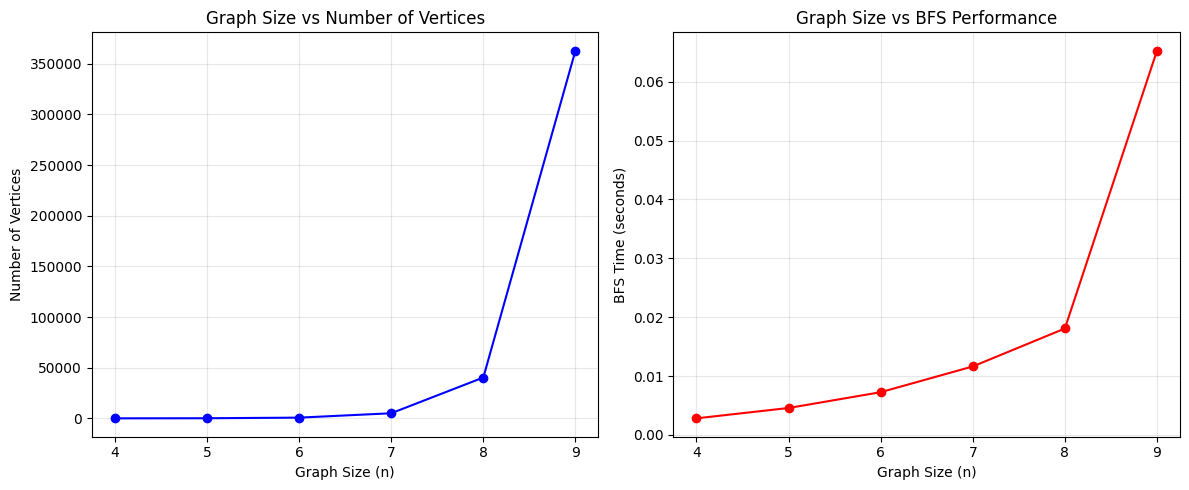

In [10]:
import time

# Benchmark BFS performance
sizes = [4, 5, 6, 7, 8, 9]
times = []
vertices = []

for n in sizes:
    graph_def = PermutationGroups.lrx(n)
    graph = CayleyGraph(graph_def, device="cpu")
    
    start_time = time.time()
    result = graph.bfs()
    end_time = time.time()
    
    times.append(end_time - start_time)
    vertices.append(result.num_vertices)
    
    print(f"LRX({n}): {result.num_vertices} vertices, {end_time - start_time:.3f} seconds")

# Plot performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(sizes, vertices, 'bo-')
ax1.set_xlabel('Graph Size (n)')
ax1.set_ylabel('Number of Vertices')
ax1.set_title('Graph Size vs Number of Vertices')
ax1.grid(True, alpha=0.3)

ax2.plot(sizes, times, 'ro-')
ax2.set_xlabel('Graph Size (n)')
ax2.set_ylabel('BFS Time (seconds)')
ax2.set_title('Graph Size vs BFS Performance')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Next Steps

This notebook covered the basics of CayleyPy. To learn more:

1. Explore other notebooks in this directory
2. Check the [CayleyPy documentation](https://cayleypy.github.io/cayleypy-docs/api.html)
3. Look at the examples in the main repository
4. Try implementing your own puzzles or permutation groups

Key concepts to explore further:
- Beam search for puzzle solving
- Custom heuristics and predictors
- GPU acceleration with PyTorch
- Large-scale graph analysis with memory optimization
- Export to NetworkX for advanced graph analysis